# Pearson correlation to show similarity between residuals and data

## load data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

DF = pd.read_csv("data_info.csv", index_col=0)
print(DF.index)
print(DF.columns)

Index(['JBNP31', 'JBNP32L', 'JBNP32', 'JBNP33L', 'JBNP33'], dtype='object', name='sample')
Index(['iq', 'sq', 'fq', 'gr', 'fgr0', 'fgr1', 'fgr2', 'csv0', 'csv1', 'csv2',
       'color', 'fgr3', 'csv3', 'fgr4', 'csv4', 'fgr_ana', 'csv_ana',
       'fgr_pbo', 'csv_pbo', 'fgr_rut', 'csv_rut', 'fgr_bro', 'csv_bro',
       'csv_ana_fix', 'fgr_ana_fix'],
      dtype='object')


In [2]:
from helper import load_fgr

fgrs = DF["fgr2"].to_list()
rs, _, gs, gdiffs = load_fgr(fgrs)

## calulate pearson in increasing range

caculate a series pearson correlation. Each pearson correlation is between the g and gdiff in range center - width/2 < r < center + width/2 for N = 1, 2, 3, ..., [(max(r) - min(r)) / step].

In [21]:
from scipy.stats import pearsonr

def calc_pear(centers, width, r, g, gdiff):
    pcs = []
    for center in centers:
        rleft = center - width / 2
        rright = center + width / 2
        msk = np.logical_and(r >= rleft, r <= rright)
        pc, _ = pearsonr(g[msk], gdiff[msk])
        pcs.append(pc)
    return pcs

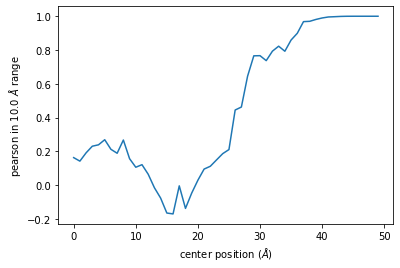

In [34]:
# test
centers = np.arange(0., 50., 1)
width = 10.
pcs = calc_pear(centers, width, rs[0], gs[0], gdiffs[0])
fig, ax = plt.subplots()
ax.plot(centers, pcs)
ax.set_xlabel(r"center position ($\AA$)")
ax.set_ylabel(fr"pearson in {width} $\AA$ range")
plt.show()

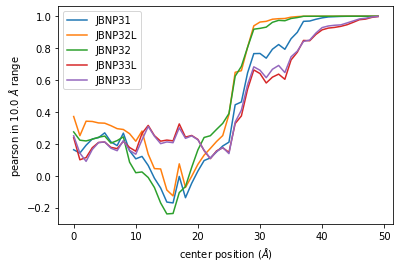

In [45]:
centers = np.arange(0., 50., 1)
width = 10.
samples = DF.index.to_list()

fig, ax = plt.subplots()

file_names = []
for r, g, gdiff, sample in zip(rs, gs, gdiffs, samples):
    pcs = calc_pear(centers, width, r, g, gdiff)
    pcs = np.array(pcs)
    
    file_name = f"calc/{sample}_moving_pearson.txt"
    np.savetxt(file_name, np.column_stack([centers, pcs]), header=f"window width: {width}\nr_center, pearsonr")
    file_names.append(file_name)
    
    ax.plot(centers, pcs, label=sample)
    ax.set_xlabel(r"center position ($\AA$)")
    ax.set_ylabel(fr"pearson in {width} $\AA$ range")
    
ax.legend(loc=2)
plt.show()

DF["moving_pearson"] = file_names
DF.to_csv("data_info.csv")

In [49]:
pcs25 = []
for r, g, gdiff in zip(rs, gs, gdiffs):
    pc25, _ = pearsonr(g[r > 25], gdiff[r > 25])
    pcs25.append(pc25)
DF["pearson_25A"] = pcs25
DF.to_csv("data_info.csv")